<a href="https://colab.research.google.com/github/Vioron/ds_belhard/blob/main/work02/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загружено строк: 7698
  airport_id                                         name          city           country iata  icao  latitude   longitude  altitude  timezone dst                 tz_db     type       source
0          1                               Goroka Airport        Goroka  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282      10.0   U  Pacific/Port_Moresby  airport  OurAirports
1          2                               Madang Airport        Madang  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20      10.0   U  Pacific/Port_Moresby  airport  OurAirports
2          3                 Mount Hagen Kagamuga Airport   Mount Hagen  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388      10.0   U  Pacific/Port_Moresby  airport  OurAirports
3          4                               Nadzab Airport        Nadzab  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239      10.0   U  Pacific/Port_Moresby  airport  OurAirports
4          5  Port More

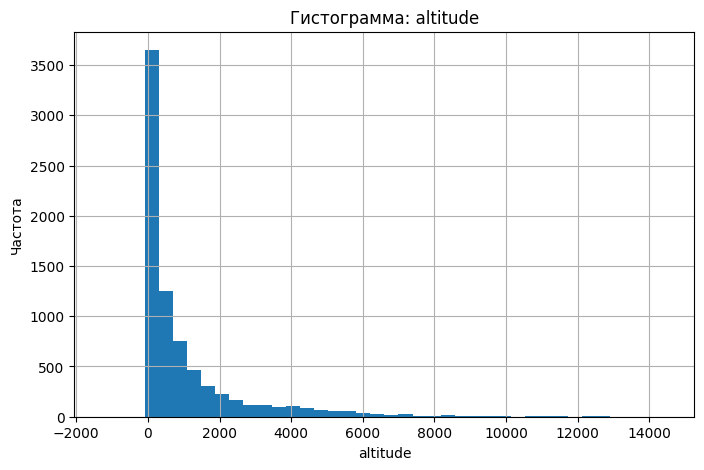

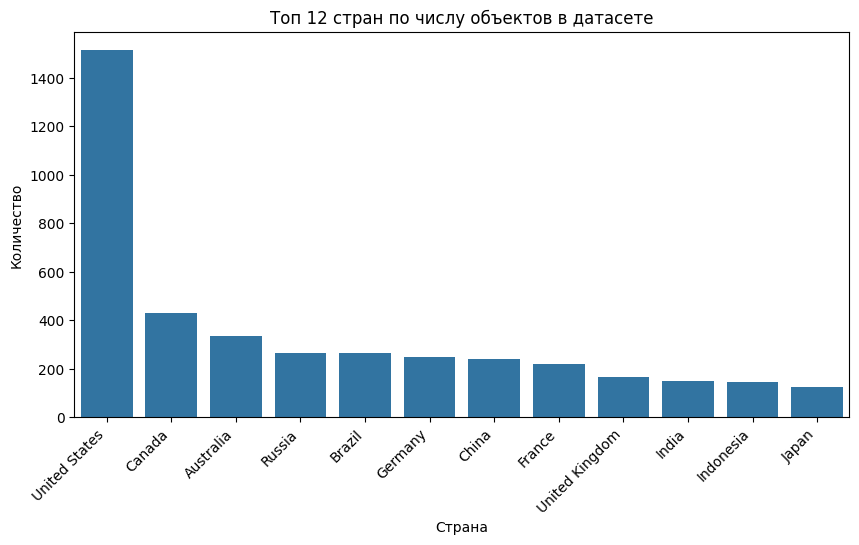

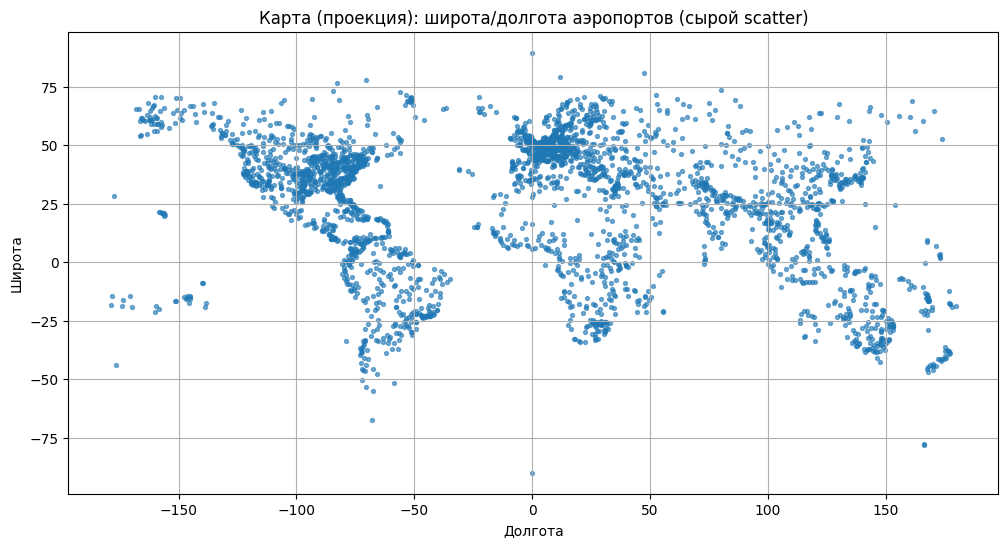

Accuracy: 0.7870
              precision    recall  f1-score   support

           0       0.49      0.27      0.35       407
           1       0.82      0.93      0.87      1518

    accuracy                           0.79      1925
   macro avg       0.66      0.60      0.61      1925
weighted avg       0.75      0.79      0.76      1925



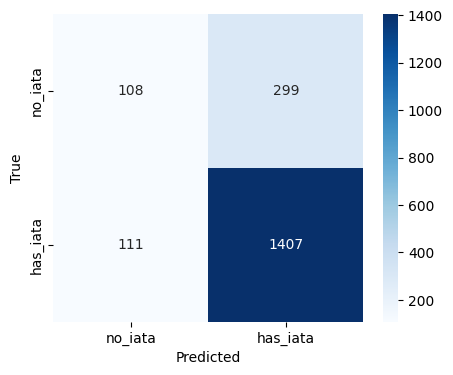

In [2]:
# main.py
from data_loader import DataLoader
from data_processing import DataProcessing
from visualization import Visualization
from model import train_and_evaluate_has_iata
import pandas as pd

DATA_URL = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat"

def main():
    # 1. Загрузка
    df = DataLoader.load_airports(DATA_URL)
    print("Загружено строк:", len(df))
    print(df.head().to_string())

    # 2. Отчёт по пропускам
    dp = DataProcessing()
    print("\nПропуски по столбцам:")
    print(dp.count_missing(df))
    print("\nОтчёт по пропускам (подробно):")
    print(dp.report_missing(df))

    # 3. Простейшее заполнение
    df_filled = dp.fill_missing(df, method='median', columns=['altitude', 'latitude', 'longitude'])

    # 4. Визуализации
    viz = Visualization()
    viz.histogram(df_filled, 'altitude', bins=40)
    viz.countplot_top_countries(df_filled, top_n=12)
    # scatter (взяли случайно до 5000 точек)
    viz.scatter_world(df_filled, color_by='has_iata' if 'has_iata' in df_filled.columns else None, sample=3000)

    # 5. Подготовка целевой переменной и обучение модели
    # Добавим колонку has_iata заранее (model готов её создать, но удобно)
    df_filled['has_iata'] = (~df_filled['iata'].isnull()) & (df_filled['iata'].str.strip() != "")
    clf = train_and_evaluate_has_iata(df_filled)


main()
